# Importing packages

In [6]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Overview

In [39]:
data = pd.read_csv('car_evaluation.csv')

In [40]:
data.shape

(1728, 7)

In [41]:
data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [43]:
data.columns = raw_data.columns.str.replace(' ', '_')

In [44]:
data.columns

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

# __Exploratory Data Analysis__

In [45]:
data = data.copy(deep=True)

In [46]:
numcols = data.select_dtypes(exclude=['object']).columns
objcols = data

In [47]:
def valuecounts(x):
     return data[x].value_counts()

In [48]:
valuecounts('number_of_persons')

2       576
4       576
more    576
Name: number_of_persons, dtype: int64

<AxesSubplot:xlabel='number_of_persons', ylabel='count'>

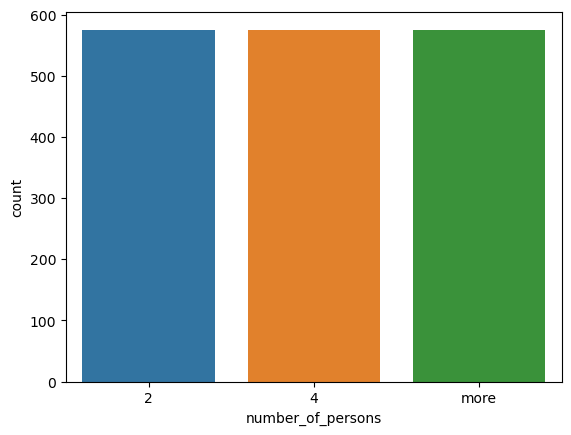

In [49]:
sns.countplot(data=data, x='number_of_persons')

## Missing Values

In [50]:
data.isna().sum()

buying_price         0
maintenance_cost     0
number_of_doors      0
number_of_persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

In [51]:
data.duplicated().sum()

0

## Encoding

In [52]:
objcol = data.select_dtypes('object').columns

In [53]:
objcol

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

In [54]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
data[objcol] = encode.fit_transform(data[objcol].values)

In [55]:
data

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [56]:
x = data.drop("decision",axis=1)
y = data["decision"]

### Splitting

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)

### Train the model

In [58]:
def dataset(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n")
    
    #model evaluation
    print(classification_report(ytest, ypred))
    return model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [27]:
knn = dataset(KNeighborsClassifier())

Training Accuracy : 0.9553349875930521
Testing Accuracy : 0.9190751445086706


              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       111
         1.0       0.87      0.59      0.70        22
         2.0       0.94      0.99      0.96       368
         3.0       1.00      0.67      0.80        18

    accuracy                           0.92       519
   macro avg       0.91      0.76      0.82       519
weighted avg       0.92      0.92      0.92       519



In [29]:
svm = dataset(SVC())

Training Accuracy : 0.9330024813895782
Testing Accuracy : 0.8863198458574181


              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73       111
         1.0       0.83      0.23      0.36        22
         2.0       0.92      0.98      0.95       368
         3.0       1.00      0.83      0.91        18

    accuracy                           0.89       519
   macro avg       0.88      0.69      0.74       519
weighted avg       0.88      0.89      0.88       519



In [30]:
dt = dataset(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9691714836223507


              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       111
         1.0       0.90      0.86      0.88        22
         2.0       0.99      0.98      0.99       368
         3.0       0.94      0.94      0.94        18

    accuracy                           0.97       519
   macro avg       0.94      0.93      0.94       519
weighted avg       0.97      0.97      0.97       519



In [31]:
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entr

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=16; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entrop

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [33]:
grid.best_score_

0.972699838825829

In [34]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=11)

In [35]:
dt = dataset(grid.best_estimator_)

Training Accuracy : 0.9950372208436724
Testing Accuracy : 0.9633911368015414


              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       111
         1.0       0.85      0.77      0.81        22
         2.0       0.99      0.98      0.98       368
         3.0       1.00      0.89      0.94        18

    accuracy                           0.96       519
   macro avg       0.94      0.90      0.92       519
weighted avg       0.96      0.96      0.96       519



In [36]:
from sklearn import tree

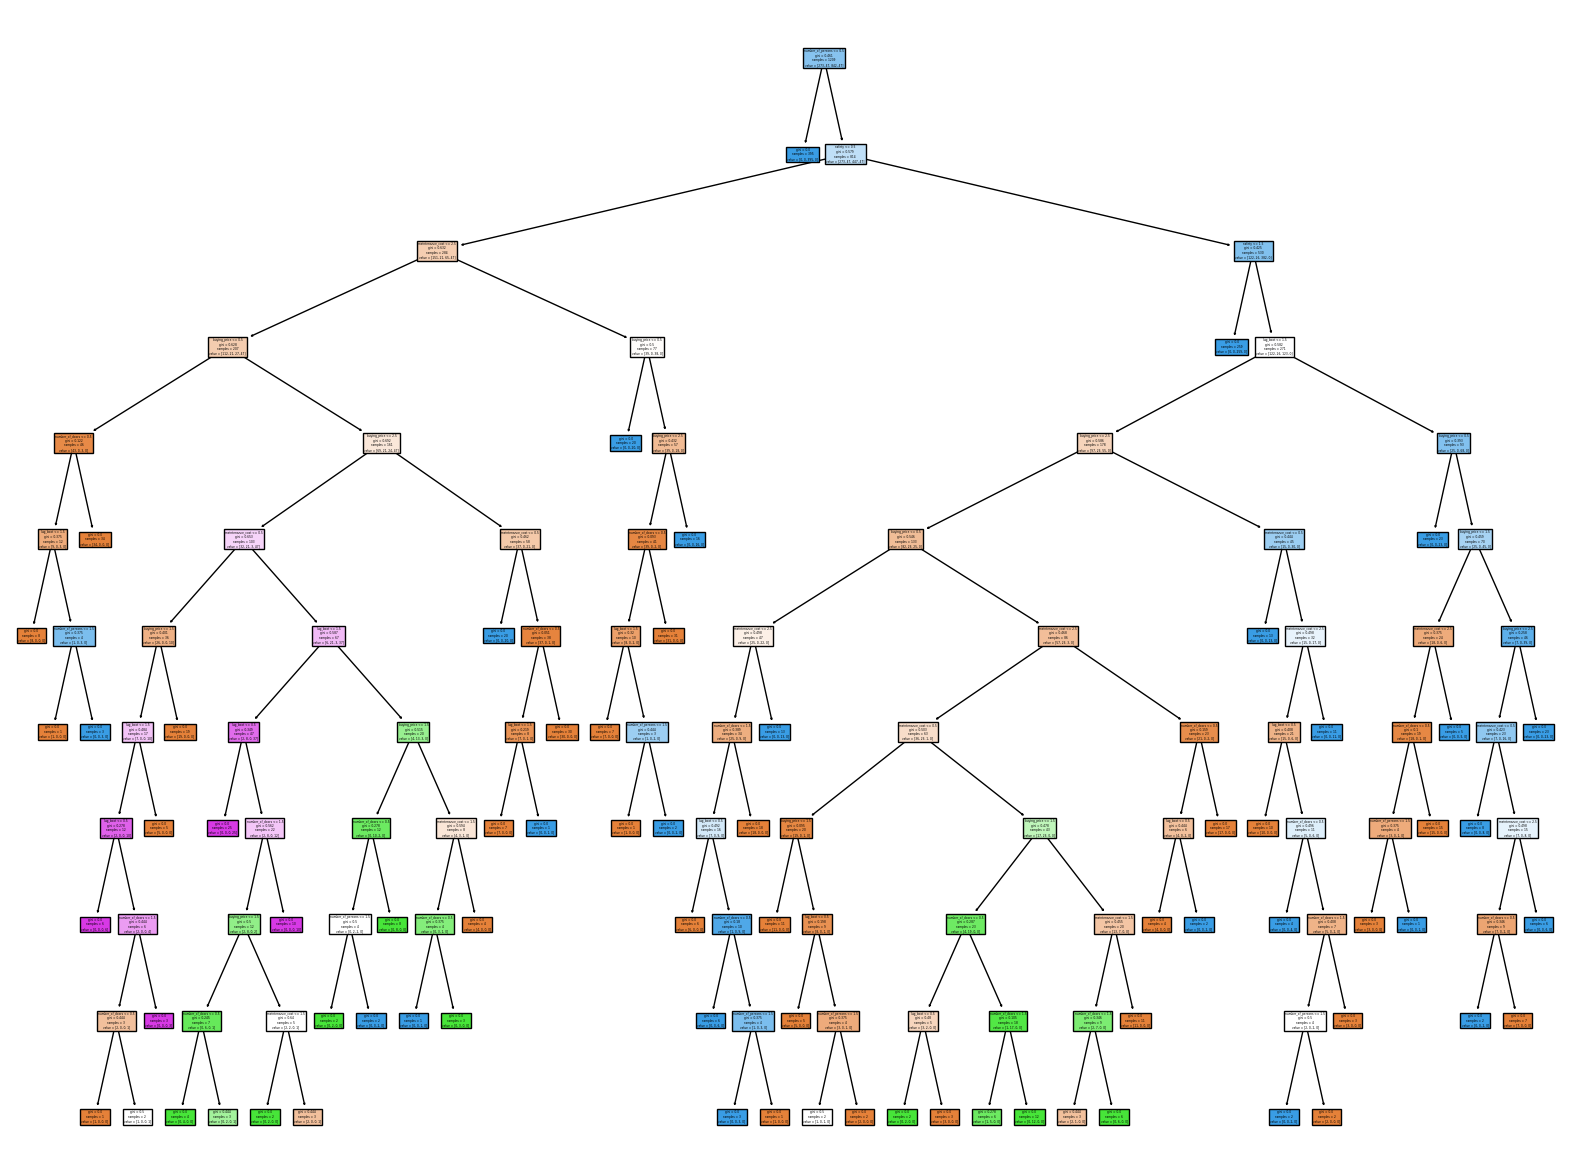

In [38]:
fig, ax = plt.subplots(figsize=(20, 15))
tree.plot_tree(dt, feature_names=objcol , filled=True)
plt.show()